In [1]:
import pickle
import matplotlib.pyplot as plt
import imageio #read image
import cv2
import numpy as np
from dataloader_data_analysis import *

In [2]:
#open pickle var
def openFilePkl(path):
    with open(path, 'rb') as f:
        loaded = pickle.load(f, encoding="latin1") 
    return loaded

In [3]:
testset = ChaLearnDataset('./ChaLearn_First_Impression/test/', 'test_video', 'test_transcription/transcription_test.pkl', 'test_groundtruth/annotation_test.pkl', 'eth_gender_annotations_test.csv')

In [25]:
print(testset[0])

{'transcription': "So I'm going to take a bite and experience it with you guys. [you heard it all? 00:00:07]. Now when you don't bite the seeds, see -", 'groundtruth': [0.4205607476635514, 0.6593406593406592, 0.47572815533980584, 0.5625, 0.5777777777777777], 'gender': '1', 'ethnicity': '2', 'name': '--Ymqszjv54.000.mp4'}


In [5]:
#--------Analysis Model with Metadata (2) middle layer -------------

In [6]:
resModelMeta2 = openFilePkl('resultsModelMeta2.pickle')

In [7]:
print(resModelMeta2[0])

{'Name': '9RfE2-aTvaM.002.mp4', 'Accuracy per Trait': tensor([0.9510, 0.9534, 0.9997, 0.8703, 0.8338], device='cuda:0'), 'Accuracy Average': tensor(0.9217, device='cuda:0'), 'MSE per Trait:': tensor([2.3973e-03, 2.1714e-03, 8.4398e-08, 1.6811e-02, 2.7621e-02],
       device='cuda:0')}


In [8]:
def accuracyAnalysis(data):
    accuracy25 = []
    accuracy50 = []
    accuracy75 = []
    accuracy90 = []
    accuracy100 = []
    
    for i in data:
        if i['Accuracy Average'] <= 0.25:
            accuracy25.append(i)
        elif i['Accuracy Average'] > 0.25 and i['Accuracy Average'] <= 0.50:
            accuracy50.append(i)
        elif i['Accuracy Average'] > 0.50 and i['Accuracy Average'] <= 0.75:
            accuracy75.append(i)
        elif i['Accuracy Average'] > 0.75 and i['Accuracy Average'] <= 0.95:
            accuracy90.append(i)
        elif i['Accuracy Average'] > 0.95 and i['Accuracy Average'] <= 1.0:
            accuracy100.append(i)
    
    return accuracy25, accuracy50, accuracy75, accuracy90, accuracy100

In [9]:
def getMaxIndex(dataset, prediction):
    counterExtra = 0
    counterAgree = 0
    counterCons = 0
    counterNeuro = 0
    counterOpen = 0
    
    for i in prediction: 
        for j in dataset:
            if i['Name'] == j['name']:
                max_value = max(j['groundtruth'])
                max_index = j['groundtruth'].index(max_value)

                if max_index == 0:
                    counterExtra += 1
                elif max_index == 1:
                    counterAgree += 1
                elif max_index == 2:
                    counterCons += 1
                elif max_index == 3:
                    counterNeuro += 1
                elif max_index == 4:
                    counterOpen += 1
    
    print('Num max extraversion: ', counterExtra)
    print('Num max agree: ', counterAgree)
    print('Num max cons: ', counterCons)
    print('Num max neuro: ', counterNeuro)
    print('Num max open: ', counterOpen)
    
    return counterExtra, counterAgree, counterCons, counterNeuro, counterOpen

In [10]:
def getMaxIndexTest(dataset):
    counterExtra = 0
    counterAgree = 0
    counterCons = 0
    counterNeuro = 0
    counterOpen = 0
    
    for i in dataset:
        max_value = max(i['groundtruth'])
        max_index = i['groundtruth'].index(max_value)

        if max_index == 0:
            counterExtra += 1
        elif max_index == 1:
            counterAgree += 1
        elif max_index == 2:
            counterCons += 1
        elif max_index == 3:
            counterNeuro += 1
        elif max_index == 4:
            counterOpen += 1
    
    print('Num max extraversion: ', counterExtra)
    print('Num max agree: ', counterAgree)
    print('Num max cons: ', counterCons)
    print('Num max neuro: ', counterNeuro)
    print('Num max open: ', counterOpen)
    
    return counterExtra, counterAgree, counterCons, counterNeuro, counterOpen

In [11]:
def genderEthnicityDistribution(dataset, prediction):
    counterMale = 0
    counterFemale = 0
    counterAsian = 0
    counterCaucasian = 0
    counterAfricanAmerican = 0
    for i in prediction: 
        for j in dataset:
            if i['Name'] == j['name']:
                if int(j['gender']) == 1:
                    counterMale += 1
                elif int(j['gender']) == 2:
                    counterFemale += 1
                if int(j['ethnicity']) == 1:
                    counterAsian += 1
                elif int(j['ethnicity']) == 2:
                    counterCaucasian += 1
                elif int(j['ethnicity']) == 3:
                    counterAfricanAmerican += 1
    
    print('Male: ', counterMale)
    print('Female: ', counterFemale)
    print('Asian: ', counterAsian)
    print('Caucasian: ', counterCaucasian)
    print('African American: ', counterAfricanAmerican)
    
    return counterMale, counterFemale, counterAsian, counterCaucasian, counterAfricanAmerican

In [12]:
def genderEthnicityDistributionTest(dataset):
    counterMale = 0
    counterFemale = 0
    counterAsian = 0
    counterCaucasian = 0
    counterAfricanAmerican = 0
    
    for i in dataset:
        if int(i['gender']) == 1:
            counterMale += 1
        elif int(i['gender']) == 2:
            counterFemale += 1
        if int(i['ethnicity']) == 1:
            counterAsian += 1
        elif int(i['ethnicity']) == 2:
            counterCaucasian += 1
        elif int(i['ethnicity']) == 3:
            counterAfricanAmerican += 1
    
    print('Male: ', counterMale)
    print('Female: ', counterFemale)
    print('Asian: ', counterAsian)
    print('Caucasian: ', counterCaucasian)
    print('African American: ', counterAfricanAmerican)
    
    return counterMale, counterFemale, counterAsian, counterCaucasian, counterAfricanAmerican

In [13]:
def getPercentageofOrig(testOrig, prediction):
    percentage = (prediction*100)/testOrig
    return percentage

In [36]:
def collectPartOfRes(val, num = 20):
    counterExtra = 0
    counterAgree = 0
    counterCons = 0
    counterNeuro = 0
    counterOpen = 0
    
    saveRes = []
    
    for i in val:
        max_value = max(i['Accuracy per Trait'])
        max_index = i['Accuracy per Trait'].tolist().index(max_value)

        if max_index == 0 and counterExtra < num:
            counterExtra += 1
            saveRes.append(i)
        elif max_index == 1 and counterAgree < num:
            counterAgree += 1
            saveRes.append(i)
        elif max_index == 2 and counterCons < num:
            counterCons += 1
            saveRes.append(i)
        elif max_index == 3 and counterNeuro < num:
            counterNeuro += 1
            saveRes.append(i)
        elif max_index == 4 and counterOpen < num:
            counterOpen += 1
            saveRes.append(i)
    return saveRes

In [30]:
def showVidWithTrait(val, orig):
    for i in val:
        for j in orig:
            if i['Name'] == j['name']:
                max_value = max(i['Accuracy per Trait'])
                max_index = i['Accuracy per Trait'].tolist().index(max_value)
                
                max_value_orig = max(j['groundtruth'])
                max_index_orig = j['groundtruth'].index(max_value_orig)
                
                if max_index == 0:
                    print('Extraversion: {}, {}, MAA: {}'.format(i['Name'], max_value, i['Accuracy Average']))
                elif max_index == 1:
                    print('Agreeableness: {}, {}, MAA: {}'.format(i['Name'], max_value, i['Accuracy Average']))
                elif max_index == 2:
                    print('Consiouness: {}, {}, MAA: {}'.format(i['Name'], max_value, i['Accuracy Average']))
                elif max_index == 3:
                    print('Neuroticism: {}, {}, MAA: {}'.format(i['Name'], max_value, i['Accuracy Average']))
                elif max_index == 4:
                    print('Openness: {}, {}, MAA: {}'.format(i['Name'], max_value, i['Accuracy Average']))  
                
                if max_index_orig == 0:
                    print('Extraversion Orig {}, Gender: {}, Ethn: {}: '.format(max_value_orig, j['gender'], j['ethnicity']))
                elif max_index_orig == 1:
                    print('Agreeableness Orig {}, Gender: {}, Ethn: {}: '.format(max_value_orig, j['gender'], j['ethnicity']))
                elif max_index_orig == 2:
                    print('Consiouness Orig {}, Gender: {}, Ethn: {}: '.format(max_value_orig, j['gender'], j['ethnicity']))
                elif max_index_orig == 3:
                    print('Neuroticism Orig {}, Gender: {}, Ethn: {}: '.format(max_value_orig, j['gender'], j['ethnicity']))
                elif max_index_orig == 4:
                    print('Openness Orig {}, Gender: {}, Ethn: {}: '.format(max_value_orig, j['gender'], j['ethnicity']))  

In [14]:
acc25, acc50, acc75, acc90, acc100 = accuracyAnalysis(resModelMeta2)

In [15]:
#----Show amount of data per accuracy frame ---
print('Accuracy <= 0.25: ', len(acc25))
print('Accuracy > 0.25 and <= 0.50: ', len(acc50))
print('Accuracy > 0.50 and <= 0.75: ', len(acc75))
print('Accuracy > 0.75 and <= 0.90: ', len(acc90))
print('Accuracy > 0.90 and <= 1.00: ', len(acc100))

Accuracy <= 0.25:  0
Accuracy > 0.25 and <= 0.50:  0
Accuracy > 0.50 and <= 0.75:  31
Accuracy > 0.75 and <= 0.90:  1669
Accuracy > 0.90 and <= 1.00:  299


In [16]:
#----Show amount of data per accuracy frame ---
print('Accuracy <= 0.25: ', len(acc25))
print('Accuracy > 0.25 and <= 0.50: ', len(acc50))
print('Accuracy > 0.50 and <= 0.75: ', len(acc75))
print('Accuracy > 0.75 and <= 0.95: ', len(acc90))
print('Accuracy > 0.95 and <= 1.00: ', len(acc100))

Accuracy <= 0.25:  0
Accuracy > 0.25 and <= 0.50:  0
Accuracy > 0.50 and <= 0.75:  31
Accuracy > 0.75 and <= 0.95:  1669
Accuracy > 0.95 and <= 1.00:  299


In [17]:
for i in acc75:
    print(i['Accuracy Average'], i['Name'])

tensor(0.6878, device='cuda:0') VuadgOz6T7s.005.mp4
tensor(0.7286, device='cuda:0') hquzfo9MVDo.005.mp4
tensor(0.7474, device='cuda:0') 2bAsXLQjlt8.003.mp4
tensor(0.7479, device='cuda:0') ihEFzP5S57g.002.mp4
tensor(0.7339, device='cuda:0') sSR1a5XW7n4.003.mp4
tensor(0.7141, device='cuda:0') Pc-oQQwkIv8.002.mp4
tensor(0.5774, device='cuda:0') ZkypeQdzgvQ.001.mp4
tensor(0.6698, device='cuda:0') 4bDOetaLvZs.002.mp4
tensor(0.7464, device='cuda:0') Tg8a_iNEamM.002.mp4
tensor(0.7452, device='cuda:0') VvSk5m90xOs.001.mp4
tensor(0.6659, device='cuda:0') omeHsKF7InA.003.mp4
tensor(0.7472, device='cuda:0') BS0wgLXqFgc.002.mp4
tensor(0.6897, device='cuda:0') jFx6AEw6viQ.003.mp4
tensor(0.7275, device='cuda:0') xsDABUrvs6w.003.mp4
tensor(0.7234, device='cuda:0') fsLf6Xv_Gbk.003.mp4
tensor(0.7333, device='cuda:0') -R2SZu3SYgM.001.mp4
tensor(0.6830, device='cuda:0') TkCDs7NlXyU.003.mp4
tensor(0.7126, device='cuda:0') ASDpn9yOYAo.001.mp4
tensor(0.7281, device='cuda:0') SPMDX6qt4I4.000.mp4
tensor(0.713

In [31]:
showVidWithTrait(acc75, testset)

Extraversion: VuadgOz6T7s.005.mp4, 0.7139565348625183, MAA: 0.6877605319023132
Consiouness Orig 0.31067961165048547, Gender: 1, Ethn: 2: 
Openness: hquzfo9MVDo.005.mp4, 0.8153687715530396, MAA: 0.7285610437393188
Openness Orig 0.3555555555555556, Gender: 1, Ethn: 2: 
Consiouness: 2bAsXLQjlt8.003.mp4, 0.778627872467041, MAA: 0.7474005222320557
Openness Orig 0.888888888888889, Gender: 2, Ethn: 2: 
Openness: ihEFzP5S57g.002.mp4, 0.8990147113800049, MAA: 0.7479482293128967
Openness Orig 0.5, Gender: 2, Ethn: 2: 
Agreeableness: sSR1a5XW7n4.003.mp4, 0.8519648313522339, MAA: 0.733910083770752
Agreeableness Orig 0.5384615384615384, Gender: 1, Ethn: 3: 
Openness: Pc-oQQwkIv8.002.mp4, 0.8547263145446777, MAA: 0.7141108512878418
Openness Orig 0.3111111111111111, Gender: 1, Ethn: 2: 
Consiouness: ZkypeQdzgvQ.001.mp4, 0.6165508031845093, MAA: 0.5773535966873169
Consiouness Orig 0.2038834951456311, Gender: 2, Ethn: 2: 
Extraversion: 4bDOetaLvZs.002.mp4, 0.7531374096870422, MAA: 0.6697654128074646
Ex

In [37]:
partOfAcc95 = collectPartOfRes(acc90, 20)

In [38]:
print(len(partOfAcc95))

100


In [39]:
showVidWithTrait(partOfAcc95, testset)

Consiouness: 9RfE2-aTvaM.002.mp4, 0.9997094869613647, MAA: 0.9216589331626892
Agreeableness Orig 0.5934065934065933, Gender: 1, Ethn: 2: 
Consiouness: g0PWBzU95sI.003.mp4, 0.9967731833457947, MAA: 0.9103599786758423
Neuroticism Orig 0.7395833333333333, Gender: 1, Ethn: 2: 
Openness: 7qGYGbIg45c.001.mp4, 0.9933702945709229, MAA: 0.9216386079788208
Openness Orig 0.3777777777777778, Gender: 1, Ethn: 2: 
Openness: nghDz0el8iI.002.mp4, 0.9947778582572937, MAA: 0.9497381448745728
Openness Orig 0.711111111111111, Gender: 2, Ethn: 2: 
Consiouness: 1mHjMNZZvFo.001.mp4, 0.9316357970237732, MAA: 0.8641414046287537
Consiouness Orig 0.7961165048543688, Gender: 2, Ethn: 2: 
Openness: 3JAFkk42zPs.003.mp4, 0.9671505689620972, MAA: 0.8056235313415527
Openness Orig 0.3777777777777778, Gender: 1, Ethn: 2: 
Consiouness: wzCdM6Fe_4A.002.mp4, 0.9897027611732483, MAA: 0.9291898608207703
Consiouness Orig 0.5436893203883495, Gender: 2, Ethn: 3: 
Consiouness: CQMH9Qguuao.001.mp4, 0.9443434476852417, MAA: 0.8951

Extraversion: x0mD5kr2hu4.005.mp4, 0.9898315072059631, MAA: 0.9464911818504333
Openness Orig 0.8222222222222221, Gender: 2, Ethn: 2: 
Agreeableness: 9RfE2-aTvaM.004.mp4, 0.9799803495407104, MAA: 0.937030017375946
Neuroticism Orig 0.6770833333333334, Gender: 1, Ethn: 2: 
Neuroticism: 0G2o3fik36I.000.mp4, 0.9605604410171509, MAA: 0.9300514459609985
Extraversion Orig 0.691588785046729, Gender: 1, Ethn: 2: 
Consiouness: b8GPFr11adA.000.mp4, 0.9658603668212891, MAA: 0.9385464787483215
Agreeableness Orig 0.6263736263736264, Gender: 1, Ethn: 2: 
Extraversion: Y9WX7ucPP-o.003.mp4, 0.9356529712677002, MAA: 0.8764463663101196
Openness Orig 0.8333333333333333, Gender: 1, Ethn: 2: 
Extraversion: hPguTv1Zvg8.005.mp4, 0.996846079826355, MAA: 0.9454633593559265
Agreeableness Orig 0.6923076923076923, Gender: 1, Ethn: 2: 
Extraversion: UVMEzA3yHsM.004.mp4, 0.9854998588562012, MAA: 0.9371452331542969
Agreeableness Orig 0.6153846153846153, Gender: 1, Ethn: 2: 
Extraversion: 19pTUX8KfYM.003.mp4, 0.9845055

In [40]:
partOfAcc100 = collectPartOfRes(acc100, 20)

In [41]:
print(len(partOfAcc100))

100


In [42]:
showVidWithTrait(partOfAcc100, testset)

Neuroticism: 2Z8Xi_DTlpI.005.mp4, 0.9932387471199036, MAA: 0.9545516967773438
Openness Orig 0.7888888888888888, Gender: 2, Ethn: 2: 
Neuroticism: WpEZOSrENL0.005.mp4, 0.9924097061157227, MAA: 0.9644140601158142
Openness Orig 0.611111111111111, Gender: 2, Ethn: 2: 
Consiouness: qoztP0w5-Vo.002.mp4, 0.9802873730659485, MAA: 0.9571796655654907
Openness Orig 0.7333333333333333, Gender: 1, Ethn: 2: 
Extraversion: FksSYDfLH04.000.mp4, 0.9995752573013306, MAA: 0.9606000781059265
Agreeableness Orig 0.5934065934065933, Gender: 2, Ethn: 3: 
Extraversion: PWM-bKcs2p8.002.mp4, 0.9972795844078064, MAA: 0.9791345000267029
Agreeableness Orig 0.4395604395604395, Gender: 1, Ethn: 3: 
Neuroticism: J9WyswA0vow.005.mp4, 0.9832921624183655, MAA: 0.950596809387207
Openness Orig 0.5888888888888889, Gender: 1, Ethn: 2: 
Consiouness: 6NjuNY4LfQc.000.mp4, 0.9854620695114136, MAA: 0.9596628546714783
Consiouness Orig 0.6601941747572816, Gender: 2, Ethn: 2: 
Extraversion: T1_6sVNHG70.004.mp4, 0.9734421372413635, M

Agreeableness: s6N1pv5lzrU.001.mp4, 0.992542028427124, MAA: 0.9695672988891602
Agreeableness Orig 0.5494505494505494, Gender: 1, Ethn: 2: 
Agreeableness: r9TaaVTo8Y8.005.mp4, 0.9781138300895691, MAA: 0.9510084986686707
Consiouness Orig 0.6407766990291262, Gender: 2, Ethn: 2: 
Openness: mBdVuEXRlfQ.005.mp4, 0.9944729804992676, MAA: 0.9584644436836243
Neuroticism Orig 0.7500000000000001, Gender: 2, Ethn: 2: 
Extraversion: GHetseJP358.000.mp4, 0.9912363886833191, MAA: 0.9539335370063782
Consiouness Orig 0.5728155339805825, Gender: 2, Ethn: 2: 
Openness: gkhbUDIK-YM.002.mp4, 0.9985939264297485, MAA: 0.9624312520027161
Consiouness Orig 0.5825242718446602, Gender: 2, Ethn: 3: 
Openness: C3knX70mzxQ.002.mp4, 0.9843240976333618, MAA: 0.9629831314086914
Openness Orig 0.5888888888888889, Gender: 1, Ethn: 2: 
Openness: Gdrgw7Z6tLg.001.mp4, 0.991294801235199, MAA: 0.9564769864082336
Agreeableness Orig 0.6813186813186812, Gender: 1, Ethn: 2: 


In [260]:
#------Get Trait distribution of predicted test data with max trait values --------

In [261]:
#Test
print('Max values of traits for test data - all: ')
counterExtraTest, counterAgreeTest, counterConsTest, counterNeuroTest, counterOpenTest = getMaxIndexTest(testset)

Max values of traits for test data - all: 
Num max extraversion:  105
Num max agree:  528
Num max cons:  424
Num max neuro:  229
Num max open:  714


In [262]:
maleTest, femaleTest, asianTest, caucasianTest, africanAmericanTest = genderEthnicityDistributionTest(testset)

Male:  888
Female:  1112
Asian:  48
Caucasian:  1728
African American:  224


In [263]:
#----Acc 0.5 - 0.75 ----
print('Max values of traits for Acc 0.5 - 0.75:')
counterExtraTest75, counterAgreeTest75, counterConsTest75, counterNeuroTest75, counterOpenTest75 = getMaxIndex(testset, acc75)

Max values of traits for Acc 0.5 - 0.75:
Num max extraversion:  4
Num max agree:  6
Num max cons:  8
Num max neuro:  1
Num max open:  12


In [264]:
percentageExtra, percentageAgree, percentageCons, percentageNeuro, percentageOpen = getPercentageofOrig(counterExtraTest, counterExtraTest75), getPercentageofOrig(counterAgreeTest, counterAgreeTest75), getPercentageofOrig(counterConsTest, counterConsTest75), getPercentageofOrig(counterNeuroTest, counterNeuroTest75), getPercentageofOrig(counterOpenTest, counterOpenTest75)
print('Percentage Extraversion: {} \n Percentage Agree: {} \n Percentage Cons: {} \n Percentage Neuro: {} \n Percentage Open: {}'.format(percentageExtra, percentageAgree, percentageCons, percentageNeuro, percentageOpen))

Percentage Extraversion: 3.8095238095238093 
 Percentage Agree: 1.1363636363636365 
 Percentage Cons: 1.8867924528301887 
 Percentage Neuro: 0.4366812227074236 
 Percentage Open: 1.680672268907563


In [291]:
percentageExtra75, percentageAgree75, percentageCons75, percentageNeuro75, percentageOpen75 = getPercentageofOrig(len(acc75), counterExtraTest75), getPercentageofOrig(len(acc75), counterAgreeTest75), getPercentageofOrig(len(acc75), counterConsTest75), getPercentageofOrig(len(acc75), counterNeuroTest75), getPercentageofOrig(len(acc75), counterOpenTest75)
print('Percentage Extraversion: {} \n Percentage Agree: {} \n Percentage Cons: {} \n Percentage Neuro: {} \n Percentage Open: {}'.format(percentageExtra75, percentageAgree75, percentageCons75, percentageNeuro75, percentageOpen75))

Percentage Extraversion: 12.903225806451612 
 Percentage Agree: 19.35483870967742 
 Percentage Cons: 25.806451612903224 
 Percentage Neuro: 3.225806451612903 
 Percentage Open: 38.70967741935484


In [266]:
maleTest75, femaleTest75, asianTest75, caucasianTest75, africanAmericanTest75 = genderEthnicityDistribution(testset, acc75)

Male:  16
Female:  15
Asian:  0
Caucasian:  29
African American:  2


In [267]:
percentageMale75, percentageFemale75, percentageAsian75, percentageCaucasian75, percentageAfrican75 = getPercentageofOrig(maleTest, maleTest75), getPercentageofOrig(femaleTest, femaleTest75), getPercentageofOrig(asianTest, asianTest75), getPercentageofOrig(caucasianTest, caucasianTest75), getPercentageofOrig(africanAmericanTest, africanAmericanTest75)
print('Percentage Male: {} \n Percentage Female: {} \n Percentage Asian: {} \n Percentage Caucasian: {} \n Percentage African: {}'.format(percentageMale75, percentageFemale75, percentageAsian75, percentageCaucasian75, percentageAfrican75))

Percentage Male: 1.8018018018018018 
 Percentage Female: 1.3489208633093526 
 Percentage Asian: 0.0 
 Percentage Caucasian: 1.6782407407407407 
 Percentage African: 0.8928571428571429


In [268]:
#-percentage within the distribution - 
percentageMale75, percentageFemale75, percentageAsian75, percentageCaucasian75, percentageAfrican75 = getPercentageofOrig(len(acc75), maleTest75), getPercentageofOrig(len(acc75), femaleTest75), getPercentageofOrig(len(acc75), asianTest75), getPercentageofOrig(len(acc75), caucasianTest75), getPercentageofOrig(len(acc75), africanAmericanTest75)
print('Percentage Male: {} \n Percentage Female: {} \n Percentage Asian: {} \n Percentage Caucasian: {} \n Percentage African: {}'.format(percentageMale75, percentageFemale75, percentageAsian75, percentageCaucasian75, percentageAfrican75))

Percentage Male: 51.61290322580645 
 Percentage Female: 48.38709677419355 
 Percentage Asian: 0.0 
 Percentage Caucasian: 93.54838709677419 
 Percentage African: 6.451612903225806


In [269]:
print('Max values of traits for Acc 0.75 - 0.95:')
counterExtraTest90, counterAgreeTest90, counterConsTest90, counterNeuroTest90, counterOpenTest90 = getMaxIndex(testset, acc90)

Max values of traits for Acc 0.75 - 0.95:
Num max extraversion:  92
Num max agree:  437
Num max cons:  352
Num max neuro:  200
Num max open:  588


In [270]:
percentageExtra, percentageAgree, percentageCons, percentageNeuro, percentageOpen = getPercentageofOrig(counterExtraTest, counterExtraTest90), getPercentageofOrig(counterAgreeTest, counterAgreeTest90), getPercentageofOrig(counterConsTest, counterConsTest90), getPercentageofOrig(counterNeuroTest, counterNeuroTest90), getPercentageofOrig(counterOpenTest, counterOpenTest90)
print('Percentage Extraversion: {} \n Percentage Agree: {} \n Percentage Cons: {} \n Percentage Neuro: {} \n Percentage Open: {}'.format(percentageExtra, percentageAgree, percentageCons, percentageNeuro, percentageOpen))

Percentage Extraversion: 87.61904761904762 
 Percentage Agree: 82.76515151515152 
 Percentage Cons: 83.01886792452831 
 Percentage Neuro: 87.33624454148472 
 Percentage Open: 82.3529411764706


In [290]:
percentageExtra90, percentageAgree90, percentageCons90, percentageNeuro90, percentageOpen90 = getPercentageofOrig(len(acc90), counterExtraTest90), getPercentageofOrig(len(acc90), counterAgreeTest90), getPercentageofOrig(len(acc90), counterConsTest90), getPercentageofOrig(len(acc90), counterNeuroTest90), getPercentageofOrig(len(acc90), counterOpenTest90)
print('Percentage Extraversion: {} \n Percentage Agree: {} \n Percentage Cons: {} \n Percentage Neuro: {} \n Percentage Open: {}'.format(percentageExtra90, percentageAgree90, percentageCons90, percentageNeuro90, percentageOpen90))

Percentage Extraversion: 5.512282804074296 
 Percentage Agree: 26.183343319352907 
 Percentage Cons: 21.09047333732774 
 Percentage Neuro: 11.983223487118035 
 Percentage Open: 35.23067705212702


In [272]:
maleTest90, femaleTest90, asianTest90, caucasianTest90, africanAmericanTest90 = genderEthnicityDistribution(testset, acc90)

Male:  737
Female:  932
Asian:  36
Caucasian:  1447
African American:  186


In [273]:
percentageMale90, percentageFemale90, percentageAsian90, percentageCaucasian90, percentageAfrican90 = getPercentageofOrig(maleTest, maleTest90), getPercentageofOrig(femaleTest, femaleTest90), getPercentageofOrig(asianTest, asianTest90), getPercentageofOrig(caucasianTest, caucasianTest90), getPercentageofOrig(africanAmericanTest, africanAmericanTest90)
print('Percentage Male: {} \n Percentage Female: {} \n Percentage Asian: {} \n Percentage Caucasian: {} \n Percentage African: {}'.format(percentageMale90, percentageFemale90, percentageAsian90, percentageCaucasian90, percentageAfrican90))

Percentage Male: 82.99549549549549 
 Percentage Female: 83.81294964028777 
 Percentage Asian: 75.0 
 Percentage Caucasian: 83.73842592592592 
 Percentage African: 83.03571428571429


In [274]:
percentageMale90, percentageFemale90, percentageAsian90, percentageCaucasian90, percentageAfrican90 = getPercentageofOrig(len(acc90), maleTest90), getPercentageofOrig(len(acc90), femaleTest90), getPercentageofOrig(len(acc90), asianTest90), getPercentageofOrig(len(acc90), caucasianTest90), getPercentageofOrig(len(acc90), africanAmericanTest90)
print('Percentage Male: {} \n Percentage Female: {} \n Percentage Asian: {} \n Percentage Caucasian: {} \n Percentage African: {}'.format(percentageMale90, percentageFemale90, percentageAsian90, percentageCaucasian90, percentageAfrican90))

Percentage Male: 44.15817855002996 
 Percentage Female: 55.84182144997004 
 Percentage Asian: 2.156980227681246 
 Percentage Caucasian: 86.69862192929898 
 Percentage African: 11.144397843019773


In [275]:
print('Max values of traits for Acc 0.95 - 1.0:')
counterExtraTest100, counterAgreeTest100, counterConsTest100, counterNeuroTest100, counterOpenTest100 = getMaxIndex(testset, acc100)

Max values of traits for Acc 0.95 - 1.0:
Num max extraversion:  9
Num max agree:  84
Num max cons:  64
Num max neuro:  28
Num max open:  114


In [276]:
percentageExtra, percentageAgree, percentageCons, percentageNeuro, percentageOpen = getPercentageofOrig(counterExtraTest, counterExtraTest100), getPercentageofOrig(counterAgreeTest, counterAgreeTest100), getPercentageofOrig(counterConsTest, counterConsTest100), getPercentageofOrig(counterNeuroTest, counterNeuroTest100), getPercentageofOrig(counterOpenTest, counterOpenTest100)
print('Percentage Extraversion: {} \n Percentage Agree: {} \n Percentage Cons: {} \n Percentage Neuro: {} \n Percentage Open: {}'.format(percentageExtra, percentageAgree, percentageCons, percentageNeuro, percentageOpen))

Percentage Extraversion: 8.571428571428571 
 Percentage Agree: 15.909090909090908 
 Percentage Cons: 15.09433962264151 
 Percentage Neuro: 12.22707423580786 
 Percentage Open: 15.966386554621849


In [289]:
percentageExtra100, percentageAgree100, percentageCons100, percentageNeuro100, percentageOpen100 = getPercentageofOrig(len(acc100), counterExtraTest100), getPercentageofOrig(len(acc100), counterAgreeTest100), getPercentageofOrig(len(acc100), counterConsTest100), getPercentageofOrig(len(acc100), counterNeuroTest100), getPercentageofOrig(len(acc100), counterOpenTest100)
print('Percentage Extraversion: {} \n Percentage Agree: {} \n Percentage Cons: {} \n Percentage Neuro: {} \n Percentage Open: {}'.format(percentageExtra100, percentageAgree100, percentageCons100, percentageNeuro100, percentageOpen100))

Percentage Extraversion: 3.0100334448160537 
 Percentage Agree: 28.093645484949832 
 Percentage Cons: 21.40468227424749 
 Percentage Neuro: 9.364548494983278 
 Percentage Open: 38.12709030100334


In [135]:
maleTest100, femaleTest100, asianTest100, caucasianTest100, africanAmericanTest100 = genderEthnicityDistribution(testset, acc100)

Male:  134
Female:  165
Asian:  12
Caucasian:  251
African American:  36


In [136]:
percentageMale100, percentageFemale100, percentageAsian100, percentageCaucasian100, percentageAfrican100 = getPercentageofOrig(maleTest, maleTest100), getPercentageofOrig(femaleTest, femaleTest100), getPercentageofOrig(asianTest, asianTest100), getPercentageofOrig(caucasianTest, caucasianTest100), getPercentageofOrig(africanAmericanTest, africanAmericanTest100)
print('Percentage Male: {} \n Percentage Female: {} \n Percentage Asian: {} \n Percentage Caucasian: {} \n Percentage African: {}'.format(percentageMale100, percentageFemale100, percentageAsian100, percentageCaucasian100, percentageAfrican100))

Percentage Male: 15.09009009009009 
 Percentage Female: 14.838129496402878 
 Percentage Asian: 25.0 
 Percentage Caucasian: 14.525462962962964 
 Percentage African: 16.071428571428573


In [142]:
percentageMale100, percentageFemale100, percentageAsian100, percentageCaucasian100, percentageAfrican100 = getPercentageofOrig(len(acc100), maleTest100), getPercentageofOrig(len(acc100), femaleTest100), getPercentageofOrig(len(acc100), asianTest100), getPercentageofOrig(len(acc100), caucasianTest100), getPercentageofOrig(len(acc100), africanAmericanTest100)
print('Percentage Male: {} \n Percentage Female: {} \n Percentage Asian: {} \n Percentage Caucasian: {} \n Percentage African: {}'.format(percentageMale100, percentageFemale100, percentageAsian100, percentageCaucasian100, percentageAfrican100))

Percentage Male: 44.81605351170568 
 Percentage Female: 55.18394648829432 
 Percentage Asian: 4.013377926421405 
 Percentage Caucasian: 83.94648829431438 
 Percentage African: 12.040133779264215


In [6]:
#-------Plot the results -------


In [232]:
# Plot accuracy distribution
x =['<= 50: 0 ', '> 0.50 and <= 0.75', '> 0.75 and <= 0.95', '> 0.95 and <= 1.00']
y = [0, 31, 1669, 299]
y2 = ['0 %', '1.55 %', '83.45 %', '15 %']

In [233]:
acc5 = [0]
acc75 = [31]
acc95 = [1669]
acc100 = [299]

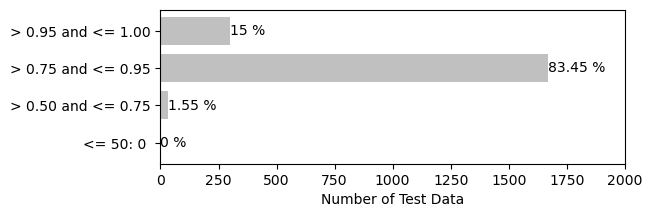

In [239]:
fig, ax = plt.subplots(figsize=(6, 2))
width = 0.75 # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups
p1 = ax.barh(ind,y, width, color=["silver", ], align='edge')
#plt.legend(p1, labels=x)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
# I added this line
ax.bar_label(p1, y2)
#plt.xticks(np.arange(5),('Pre-clinical','Phase I','Phase II','Phase III', 'Approved'))

#plt.xticks(len(2000))
plt.margins(0.2,0.05)
#plt.title('Mean Average Accuracy Distribution')
#plt.ylabel('Mean Average Accuracy')
#plt.legend(x, loc=4)
plt.xlabel('Number of Test Data')
plt.show()

In [144]:
# Plot accuracy distribution
x =['> 0.50 and <= 0.75', '> 0.75 and <= 0.95', '> 0.95 and <= 1.00']
y = [31, 1669, 299]
#y2 = ['0 %', '1.55 %', '83.45 %', '15 %']
male = [percentageMale75, percentageMale90, percentageMale100]
female = [percentageFemale75, percentageFemale90, percentageFemale100]

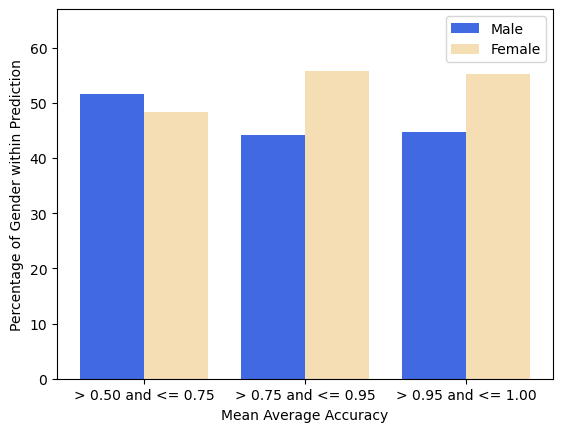

In [226]:
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male', color='royalblue')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female', color='wheat')
  
plt.xticks(X_axis, x)
plt.margins(0.05,0.2)
plt.xlabel("Mean Average Accuracy")
plt.ylabel("Percentage of Gender within Prediction")
#plt.title("Gender Distribution within the Inference on Test Data")
plt.legend()
plt.show()

In [194]:
#percentage distribution of MAA over ethnicity
# Plot accuracy distribution
x =['> 0.50 and <= 0.75', '> 0.75 and <= 0.95', '> 0.95 and <= 1.00']
asian = [percentageAsian75, percentageAsian90, percentageAsian100]
caucasian = [percentageCaucasian75, percentageCaucasian90, percentageCaucasian100]
african = [percentageAfrican75, percentageAfrican90, percentageAfrican100]

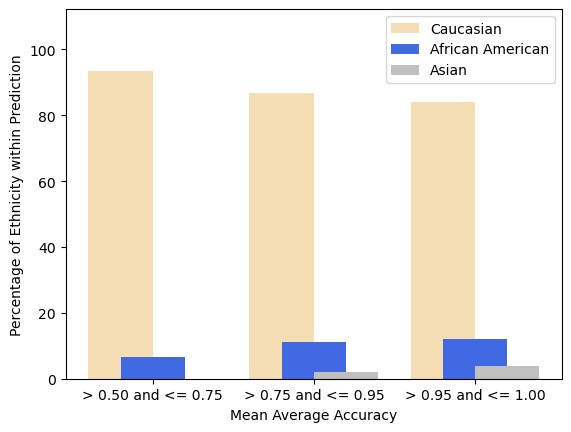

In [225]:
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, caucasian, 0.4, label = 'Caucasian', color='wheat')
plt.bar(X_axis, african, 0.4, label = 'African American', color='royalblue')
plt.bar(X_axis + 0.2, asian, 0.4, label = 'Asian', color='silver')
  
plt.xticks(X_axis, x)
plt.margins(0.05,0.2)
plt.xlabel("Mean Average Accuracy")
plt.ylabel("Percentage of Ethnicity within Prediction")
#plt.title("Ethnicity Distribution within the Inference on Test Data")
plt.legend()
plt.show()

In [284]:
#percentage distribution of MAA over personality
# Plot accuracy distribution
x =['> 0.50 and <= 0.75', '> 0.75 and <= 0.95', '> 0.95 and <= 1.00']
extra = [percentageExtra75, percentageExtra90, percentageExtra100]
agree = [percentageAgree75, percentageAgree90, percentageAgree100]
cons = [percentageCons75, percentageCons90, percentageCons100]
neuro = [percentageNeuro75, percentageNeuro90, percentageNeuro100]
openn = [percentageOpen75, percentageOpen90, percentageOpen100]
#asian = [percentageAsian75, percentageAsian90, percentageAsian100]
#caucasian = [percentageCaucasian75, percentageCaucasian90, percentageCaucasian100]
#african = [percentageAfrican75, percentageAfrican90, percentageAfrican100]

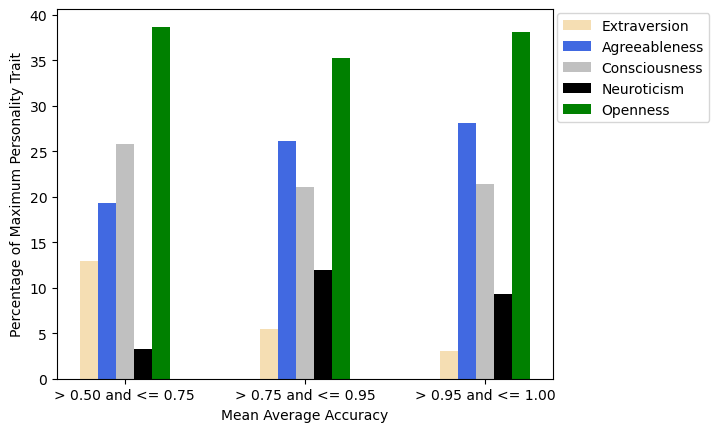

In [323]:
X_axis = np.arange(len(x))
  
plt.bar(X_axis - 0.2, extra, 0.1, label = 'Extraversion', color='wheat')
plt.bar(X_axis - 0.1, agree, 0.1, label = 'Agreeableness', color='royalblue')
plt.bar(X_axis, cons, 0.1, label = 'Consciousness', color='silver')
plt.bar(X_axis + 0.1, neuro, 0.1, label = 'Neuroticism', color='black')
plt.bar(X_axis + 0.2, openn, 0.1, label = 'Openness', color='green')
  
plt.xticks(X_axis, x)
plt.margins(0.05,0.05)
plt.xlabel("Mean Average Accuracy")
plt.ylabel("Percentage of Maximum Personality Trait")
#plt.title("Ethnicity Distribution within the Inference on Test Data")
plt.legend(bbox_to_anchor=(1, 1), borderaxespad=0.3)
plt.show()